In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas.tseries.offsets import MonthBegin, MonthEnd
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

# returns

In [2]:
df = pd.read_csv("../return/TRD_Mnth.csv",encoding='utf8',error_bad_lines=False, engine ='python')
df = df[['Stkcd','Trdmnt','Mretwd']]
df.columns = ['asset','date','ret']
df['date'] = pd.to_datetime(df['date'])  # date formated
df['date'] = df['date']+MonthEnd(0)      # date is formatted as month end
df = df[ (df['date']>='2000') & (df['date']<='2020')]
df.shape

Skipping line 473919: unexpected end of data


(362896, 3)

In [3]:
df_pivot = pd.pivot(data=df,values='ret', index='date', columns='asset')
df_pivot = df_pivot.reset_index()
df_pivot.head()

asset,date,1,2,3,4,5,6,7,8,9,...,600503,600505,600506,600507,600508,600509,600510,600511,600512,600513
0,2000-01-31,0.061891,0.161126,0.053016,0.573443,0.365894,0.161734,0.155000,1.126714,0.161017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-29,-0.011333,0.405687,0.145833,0.011949,0.040000,0.049136,0.159091,-0.061138,0.065693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-31,0.002729,-0.144302,0.180303,0.183764,0.046620,-0.028621,0.218487,-0.142908,0.296804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-30,0.037017,-0.016548,-0.124519,-0.043017,0.016704,0.071429,-0.134866,-0.012985,0.049296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-31,-0.055118,-0.047276,-0.099707,0.366124,0.095290,-0.010833,-0.025686,-0.075017,0.134228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


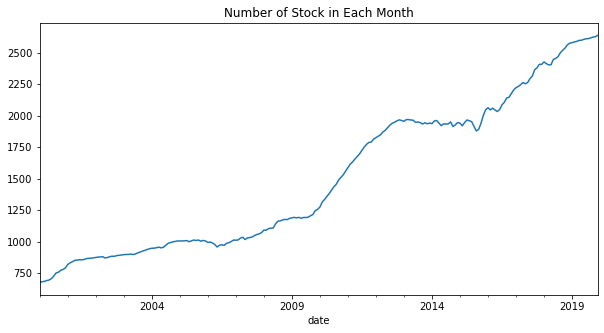

In [4]:
plt.figure(figsize=(10,5))
df.groupby('date').count()['ret'].plot()
plt.title('Number of Stock in Each Month')
plt.show()
plt.close()

# cross-sectional 

- asset characteristics

In [5]:
char_list = ['adm','beta','bm',
             'ch4mkt_beta','ch4pmo_beta','ch4smb_beta','ch4vmg_beta',
             'dbeta','de','ep','idvc','m1','m11',
             'rdm','rs','season','size','sp','sue','tv'
            ]
print(len(char_list))

20


In [6]:
for char in tqdm(char_list):
    da = pd.read_csv("../chars/"+char+".csv",encoding='utf8',error_bad_lines=False, engine ='python')
    da['Trdmnt'] = pd.to_datetime(da['Trdmnt'],format='%Y%m')
    da['Trdmnt'] = da['Trdmnt'] + MonthEnd(0)
    da = da[ (da['Trdmnt']>='2000') & (da['Trdmnt']<='2020')]
    df_melt = da.melt(id_vars=['Trdmnt'],value_name =char)
    df_melt.columns = ['date','asset',char]
    outputpath="../tmp/"+char+".csv"
    df_melt.to_csv(outputpath,sep=',',index=False,header=True)

100%|███████████████████████████████████████████| 20/20 [02:34<00:00,  7.75s/it]


In [7]:
da = df.copy()
for char in tqdm(char_list):
    s1 = pd.read_csv("../tmp/"+char+".csv",encoding='utf8',error_bad_lines=False, engine ='python')
    s1['date'] = pd.to_datetime(s1['date'])
    da = pd.merge(da,s1,how='left',on=['date','asset'])

100%|███████████████████████████████████████████| 20/20 [01:00<00:00,  3.02s/it]


In [8]:
da.shape

(362896, 23)

In [9]:
da.columns

Index(['asset', 'date', 'ret', 'adm', 'beta', 'bm', 'ch4mkt_beta',
       'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta', 'dbeta', 'de', 'ep',
       'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'size', 'sp', 'sue', 'tv'],
      dtype='object')

In [10]:
len(da.columns)

23

# time-series variables

- factors
- macro predictors

In [11]:
f= pd.read_csv("../factors/ch4/CH_4_fac_update_20211231.csv",skiprows=9,encoding='utf8',error_bad_lines=False, engine ='python')
f.rename(columns={'mnthdt':'date'}, inplace = True)
f['date'] = pd.to_datetime([str(i) for i in f['date']])
for i in f.columns[1:]:
    print(i)
    f[i]=f[i]/100
f

rf_mon
mktrf
VMG
SMB
PMO


,date,rf_mon,mktrf,VMG,SMB,PMO
0,2000-01-31,0.0019,0.1479,-0.0084,-0.0188,-0.1090
1,2000-02-29,0.0018,0.1197,-0.0728,0.0165,-0.0127
2,2000-03-31,0.0019,0.0432,-0.0050,0.0785,0.0793
3,2000-04-30,0.0018,0.0168,0.0243,-0.0056,0.0278
4,2000-05-31,0.0019,0.0220,0.0206,0.0185,-0.0093
...,...,...,...,...,...,...
259,2021-08-31,0.0013,0.0285,0.0680,0.0392,-0.0044
260,2021-09-30,0.0013,-0.0036,0.0494,-0.0170,0.0503
261,2021-10-31,0.0013,-0.0027,-0.0433,-0.0257,0.0630
262,2021-11-30,0.0013,0.0196,-0.0380,0.1149,0.0485


In [12]:
da = pd.merge(da,f,how='left',on=['date'])
da['xret']=da['ret']-da['rf_mon']
da

,asset,date,ret,adm,beta,bm,ch4mkt_beta,ch4pmo_beta,ch4smb_beta,ch4vmg_beta,...,size,sp,sue,tv,rf_mon,mktrf,VMG,SMB,PMO,xret
0,1,2000-01-31,0.061891,NaN,1.158369,0.197419,NaN,NaN,NaN,NaN,...,16.803403,0.013430,-0.615683,0.021039,0.0019,0.1479,-0.0084,-0.0188,-0.1090,0.059991
1,1,2000-02-29,-0.011333,NaN,0.946484,0.199682,NaN,NaN,NaN,NaN,...,16.792006,0.013584,-0.615683,0.022118,0.0018,0.1197,-0.0728,0.0165,-0.0127,-0.013133
2,1,2000-03-31,0.002729,NaN,0.871047,0.199139,1.038123,0.657728,-0.810119,0.540704,...,16.794731,0.013547,-0.615683,0.023400,0.0019,0.0432,-0.0050,0.0785,0.0793,0.000829
3,1,2000-04-30,0.037017,NaN,0.815708,0.142193,0.976535,0.482908,-0.763296,0.748815,...,16.831079,0.013063,-0.615683,0.022473,0.0018,0.0168,0.0243,-0.0056,0.0278,0.035217
4,1,2000-05-31,-0.055118,NaN,0.810483,0.150487,0.963793,0.544273,-0.688539,0.598539,...,16.774384,0.013825,-0.769194,0.022297,0.0019,0.0220,0.0206,0.0185,-0.0093,-0.057018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362891,600513,2017-08-31,0.047475,0.020220,1.599261,0.284797,1.031666,0.050451,0.588426,-0.725139,...,14.900761,0.055193,0.211591,0.016400,0.0013,0.0248,-0.0228,-0.0015,0.0182,0.046175
362892,600513,2017-09-30,0.009643,0.020026,1.619790,0.282077,1.050662,0.153021,0.763335,-0.391152,...,14.910358,0.054666,0.211591,0.016592,0.0012,0.0062,-0.0078,0.0110,0.0006,0.008443
362893,600513,2017-10-31,-0.034384,0.027992,1.720939,0.297229,1.058780,0.128414,1.175742,0.003014,...,14.875369,0.063340,1.250275,0.016873,0.0013,0.0135,0.0382,-0.0440,0.0463,-0.035684
362894,600513,2017-11-30,-0.113749,0.031585,1.253030,0.335378,0.835014,0.131523,1.105631,-0.161527,...,14.754614,0.071470,1.250275,0.015160,0.0012,-0.0293,0.0378,-0.0388,-0.0048,-0.114949


In [13]:
da['lag_me'] = np.exp(da['size'])
da['log_me'] = da['size']
da['me'] = da['size']
del da['size']

# output the raw data

In [14]:
da.columns

Index(['asset', 'date', 'ret', 'adm', 'beta', 'bm', 'ch4mkt_beta',
       'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta', 'dbeta', 'de', 'ep',
       'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'sp', 'sue', 'tv', 'rf_mon',
       'mktrf', 'VMG', 'SMB', 'PMO', 'xret', 'lag_me', 'log_me', 'me'],
      dtype='object')

In [15]:
da=da[[
    # id
    'asset', 'date', 'ret', 'xret', 'lag_me', 'log_me',
    # cs
    'adm', 'beta', 'bm', 
    'ch4mkt_beta','ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta', 
    'dbeta', 'de', 'ep','idvc', 
    'm1', 'm11', 'rdm', 'rs', 
    'season', 'me', 'sp', 'sue', 'tv',
    # ts
    'rf_mon', 'mktrf', 'VMG', 'SMB', 'PMO'
]
]

In [16]:
da.isna().sum()

asset              0
date               0
ret             2069
xret            2069
lag_me         26532
log_me         26532
adm            37690
beta           31844
bm             31824
ch4mkt_beta    33029
ch4pmo_beta    33029
ch4smb_beta    33029
ch4vmg_beta    33029
dbeta          60670
de             42271
ep             35216
idvc           31844
m1             28595
m11            85235
rdm            36100
rs             79941
season         98704
me             26532
sp             36578
sue            79872
tv             31844
rf_mon             0
mktrf              0
VMG                0
SMB                0
PMO                0
dtype: int64

In [17]:
da=da[~da['xret'].isna()]
da=da[~da['me'].isna()]

In [18]:
da.isna().sum()

asset              0
date               0
ret                0
xret               0
lag_me             0
log_me             0
adm             9095
beta            5137
bm              3229
ch4mkt_beta     6318
ch4pmo_beta     6318
ch4smb_beta     6318
ch4vmg_beta     6318
dbeta          33638
de             13676
ep              6621
idvc            5137
m1                 0
m11            57076
rdm             7505
rs             51346
season         79775
me                 0
sp              7983
sue            51277
tv              5137
rf_mon             0
mktrf              0
VMG                0
SMB                0
PMO                0
dtype: int64

In [19]:
da.to_csv("../share/panel_raw.csv")

# cross-sectional rank $[-1,1]$

In [20]:
def standardize(df):
    # exclude the the information columns
    col_names = df.columns.values.tolist()
    list_to_remove = ['asset', 'date',
                      'ret', 'xret', 'lag_me', 'log_me', 'rf_mon', 'mktrf', 'VMG', 'SMB', 'PMO'
                     ]
    
    col_names = list(set(col_names).difference(set(list_to_remove)))
    print(col_names)
    for col_name in tqdm(col_names):
        # print('processing %s' % col_name)
        # count the non-missing number of factors, we only count non-missing values
        unique_count = df.dropna(subset=['%s' % col_name]).groupby(['date'])['%s' % col_name].unique().apply(len)
        unique_count = pd.DataFrame(unique_count).reset_index()
        unique_count.columns = ['date', 'count']
        df = pd.merge(df, unique_count, how='left', on=['date'])
        # ranking, and then standardize the data
        df['%s_rank' % col_name] = df.groupby(['date'])['%s' % col_name].rank(method='dense')
        df['rank_%s' % col_name] = (df['%s_rank' % col_name] - 1) / (df['count'] - 1) * 2 - 1
        df = df.drop(['%s_rank' % col_name, '%s' % col_name, 'count'], axis=1)
    df = df.fillna(0)
    return df

In [21]:
da_rank = standardize(da)
da_rank.columns

['ch4mkt_beta', 'me', 'ch4vmg_beta', 'sp', 'rdm', 'de', 'ep', 'adm', 'bm', 'm1', 'rs', 'tv', 'dbeta', 'm11', 'sue', 'season', 'idvc', 'ch4smb_beta', 'beta', 'ch4pmo_beta']


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  6.75it/s]


Index(['asset', 'date', 'ret', 'xret', 'lag_me', 'log_me', 'rf_mon', 'mktrf',
       'VMG', 'SMB', 'PMO', 'rank_ch4mkt_beta', 'rank_me', 'rank_ch4vmg_beta',
       'rank_sp', 'rank_rdm', 'rank_de', 'rank_ep', 'rank_adm', 'rank_bm',
       'rank_m1', 'rank_rs', 'rank_tv', 'rank_dbeta', 'rank_m11', 'rank_sue',
       'rank_season', 'rank_idvc', 'rank_ch4smb_beta', 'rank_beta',
       'rank_ch4pmo_beta'],
      dtype='object')

In [22]:
da_rank

,asset,date,ret,xret,lag_me,log_me,rf_mon,mktrf,VMG,SMB,...,rank_rs,rank_tv,rank_dbeta,rank_m11,rank_sue,rank_season,rank_idvc,rank_ch4smb_beta,rank_beta,rank_ch4pmo_beta
0,1,2000-01-31,0.061891,0.059991,19843822.88,16.803403,0.0019,0.1479,-0.0084,-0.0188,...,0.580000,-0.390119,-0.581481,0.264000,-0.148515,0.598131,-0.945486,0.000000,0.611584,0.000000
1,1,2000-02-29,-0.011333,-0.013133,19618933.36,16.792006,0.0018,0.1197,-0.0728,0.0165,...,0.580000,-0.750000,-0.607985,0.153693,-0.148515,-0.045045,-0.942568,0.000000,0.057432,0.000000
2,1,2000-03-31,0.002729,0.000829,19672478.48,16.794731,0.0019,0.0432,-0.0050,0.0785,...,0.592233,-0.789298,-0.603571,0.094488,-0.153846,0.888412,-0.849498,-0.846154,-0.294314,0.494983
3,1,2000-04-30,0.037017,0.035217,20400692.17,16.831079,0.0018,0.0168,0.0243,-0.0056,...,0.584158,-0.899160,-0.590664,-0.325490,-0.156863,0.959514,-0.942857,-0.828571,-0.478992,0.512605
4,1,2000-05-31,-0.055118,-0.057018,19276244.57,16.774384,0.0019,0.0220,0.0206,0.0185,...,0.038462,-0.953255,-0.580645,-0.886719,-0.397436,0.490637,-0.963272,-0.786311,-0.535893,0.686144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334296,600513,2017-08-31,0.047475,0.046175,2960181.52,14.900761,0.0013,0.0248,-0.0228,-0.0015,...,-0.980563,-0.654604,0.236705,-0.135423,0.101790,0.297057,-0.767293,-0.198351,0.060009,-0.168117
334297,600513,2017-09-30,0.009643,0.008443,2988727.15,14.910358,0.0012,0.0062,-0.0078,0.0110,...,-0.979839,-0.627698,0.134665,-0.099476,0.100806,0.387889,-0.741007,-0.034173,0.054856,0.016187
334298,600513,2017-10-31,-0.034384,-0.035684,2885962.89,14.875369,0.0013,0.0135,0.0382,-0.0440,...,-0.066005,-0.578995,0.189691,-0.238369,0.731017,-0.842477,-0.688510,0.313285,0.109515,-0.036804
334299,600513,2017-11-30,-0.113749,-0.114949,2557688.18,14.754614,0.0012,-0.0293,0.0378,-0.0388,...,-0.065089,-0.697077,0.136788,-0.177136,0.734714,0.284562,-0.727192,0.279008,-0.278122,-0.010629


<AxesSubplot:>

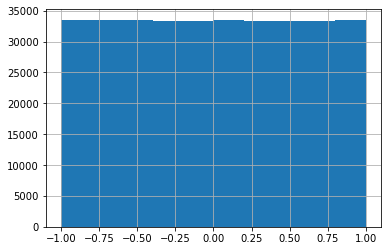

In [23]:
da_rank['rank_me'].hist()

<AxesSubplot:>

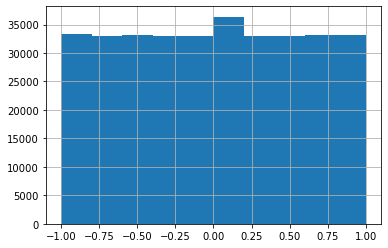

In [24]:
da_rank['rank_bm'].hist()

<AxesSubplot:>

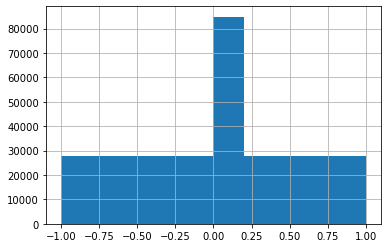

In [25]:
da_rank['rank_m11'].hist()

# output rank data

In [26]:
da_rank.to_csv("../share/panel_rank.csv")

In [27]:
da_rank.columns

Index(['asset', 'date', 'ret', 'xret', 'lag_me', 'log_me', 'rf_mon', 'mktrf',
       'VMG', 'SMB', 'PMO', 'rank_ch4mkt_beta', 'rank_me', 'rank_ch4vmg_beta',
       'rank_sp', 'rank_rdm', 'rank_de', 'rank_ep', 'rank_adm', 'rank_bm',
       'rank_m1', 'rank_rs', 'rank_tv', 'rank_dbeta', 'rank_m11', 'rank_sue',
       'rank_season', 'rank_idvc', 'rank_ch4smb_beta', 'rank_beta',
       'rank_ch4pmo_beta'],
      dtype='object')